KPI 1: Content Type Distribution
Movie: 1052 titles (72.6%)
TV Show: 398 titles (27.4%)


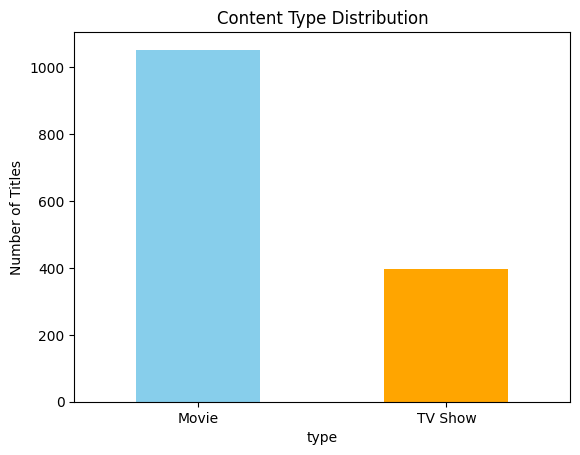


KPI 2: Top 5 Genres
 listed_in
Animation, Comedy, Family                124
Action-Adventure, Animation, Comedy       77
Action-Adventure, Animation, Kids         45
Animals & Nature, Documentary, Family     40
Action-Adventure, Animation, Family       40
Name: count, dtype: int64


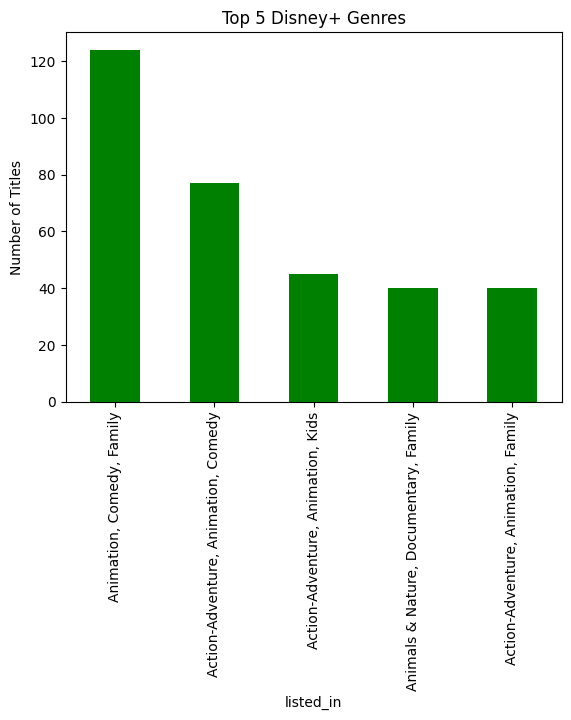


KPI 3: Average Titles Released Per Year: 16.1


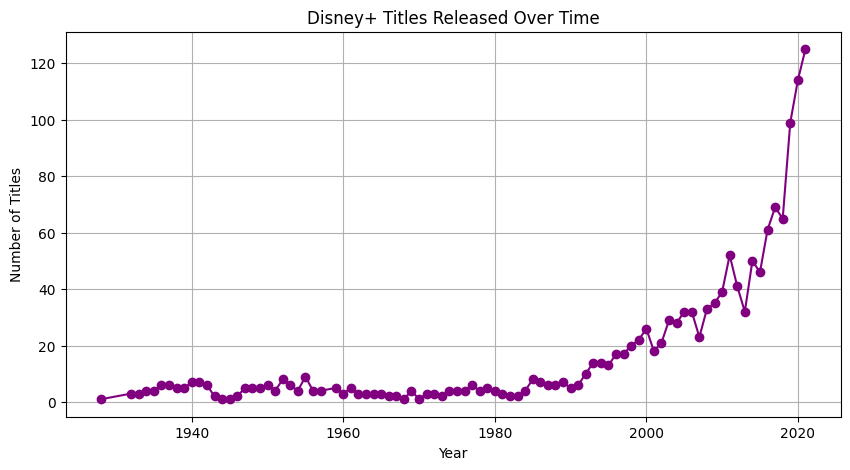


Yearly Growth Rate (%):
 release_year
1928      0.000000
1932    200.000000
1933      0.000000
1934     33.333333
1935      0.000000
           ...    
2017     13.114754
2018     -5.797101
2019     52.307692
2020     15.151515
2021      9.649123
Name: count, Length: 90, dtype: float64

SQL Query 1 - Content Type Distribution:
       type  count  percent
0    Movie   1052     72.6
1  TV Show    398     27.4

SQL Query 2 - Titles Released Per Year:
     release_year  count
0           1928      1
1           1932      3
2           1933      3
3           1934      4
4           1935      4
..           ...    ...
85          2017     69
86          2018     65
87          2019     99
88          2020    114
89          2021    125

[90 rows x 2 columns]

SQL Query 3 - Top 5 Genres:
                                    genre  count
0              Animation, Comedy, Family    124
1    Action-Adventure, Animation, Comedy     77
2      Action-Adventure, Animation, Kids     45
3  Animals & 

In [2]:
# ===============================
# Disney+ Performance Analytics
# ===============================
# This script analyzes Disney+ data, creates charts, saves them as images, and runs SQL queries.

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
df = pd.read_csv("disney_plus_titles.csv", encoding="utf-8")

# Ensure release_year is numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# -------------------------------
# Step 2: KPI 1 - Content Type Distribution
# -------------------------------
type_counts = df['type'].value_counts()
total_titles = len(df)

print("KPI 1: Content Type Distribution")
for t, count in type_counts.items():
    percent = (count / total_titles) * 100
    print(f"{t}: {count} titles ({percent:.1f}%)")

# Plot & save
type_counts.plot(kind='bar', color=['skyblue', 'orange'], title='Content Type Distribution')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.savefig("content_type_chart.png", bbox_inches='tight')
plt.show()

# -------------------------------
# Step 3: KPI 2 - Top 5 Genres
# -------------------------------
top_genres = df['listed_in'].value_counts().head(5)
print("\nKPI 2: Top 5 Genres\n", top_genres)

# Plot & save
top_genres.plot(kind='bar', color='green', title='Top 5 Disney+ Genres')
plt.ylabel('Number of Titles')
plt.savefig("top_genres_chart.png", bbox_inches='tight')
plt.show()

# -------------------------------
# Step 4: KPI 3 - Titles Released Per Year
# -------------------------------
year_counts = df['release_year'].value_counts().sort_index()
avg_per_year = year_counts.mean()
print(f"\nKPI 3: Average Titles Released Per Year: {avg_per_year:.1f}")

# Plot & save
plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='purple')
plt.title('Disney+ Titles Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.savefig("yearly_releases.png", bbox_inches='tight')
plt.show()

# Yearly growth rate
growth_rate = year_counts.pct_change().fillna(0) * 100
print("\nYearly Growth Rate (%):\n", growth_rate)

# -------------------------------
# Step 5: SQL Analysis
# -------------------------------
conn = sqlite3.connect(':memory:')
df.to_sql('disney', conn, index=False, if_exists='replace')

# SQL Query 1: Content Type
query1 = """
SELECT type, COUNT(*) AS count,
ROUND(100.0*COUNT(*)/(SELECT COUNT(*) FROM disney),1) AS percent
FROM disney
GROUP BY type;
"""
print("\nSQL Query 1 - Content Type Distribution:\n", pd.read_sql(query1, conn))

# SQL Query 2: Titles per Year
query2 = """
SELECT release_year, COUNT(*) AS count
FROM disney
GROUP BY release_year
ORDER BY release_year ASC;
"""
print("\nSQL Query 2 - Titles Released Per Year:\n", pd.read_sql(query2, conn))

# SQL Query 3: Top 5 Genres
query3 = """
SELECT listed_in AS genre, COUNT(*) AS count
FROM disney
GROUP BY listed_in
ORDER BY count DESC
LIMIT 5;
"""
print("\nSQL Query 3 - Top 5 Genres:\n", pd.read_sql(query3, conn))

# -------------------------------
# Step 6: Insights
# -------------------------------
print("\nInsights:")
print("- Movies dominate Disney+, showing focus on film content.")
print("- Family & Animation are top genres, aligning with audience preferences.")
print("- Titles released per year are increasing, indicating platform growth strategy.")
